In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [71]:
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_mapping = pd.read_csv('../data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('../data/creditcard.csv')

In [4]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
ip_mapping 

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [6]:
creditcard_data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Initial Data Info 

In [7]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
ip_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


# Handling Missing Values

In [10]:
fraud_data.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [11]:
ip_mapping.isnull().sum() 

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [12]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Cleaning*

    Remove duplicates
    Correct data types

In [72]:
#remove duplicates
fraud_data.drop_duplicates(inplace=True)
ip_mapping.drop_duplicates(inplace=True)
creditcard_data.drop_duplicates(inplace=True)

In [73]:
#correct the data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['device_id'] = fraud_data['device_id'].astype('category')
fraud_data['source'] = fraud_data['source'].astype('category')
fraud_data['browser'] = fraud_data['browser'].astype('category')
fraud_data['sex'] = fraud_data['sex'].astype('category')

In [15]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  category      
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: category(4), datetime64[ns](2), float64(1), int64(4)
memory usage: 14.2 MB


# Exploratory Data Analysis (EDA)

   **Univariate analysis**

In [16]:
fraud_data.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


In [17]:
print("\nSource unique values:")
print(fraud_data['source'].value_counts())
print("\nBrowser unique values:")
print(fraud_data['browser'].value_counts())
print("\nSex unique values:")
print(fraud_data['sex'].value_counts())
print("\nClass (Fraud) distribution:")
print(fraud_data['class'].value_counts())


Source unique values:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

Browser unique values:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

Sex unique values:
sex
M    88293
F    62819
Name: count, dtype: int64

Class (Fraud) distribution:
class
0    136961
1     14151
Name: count, dtype: int64


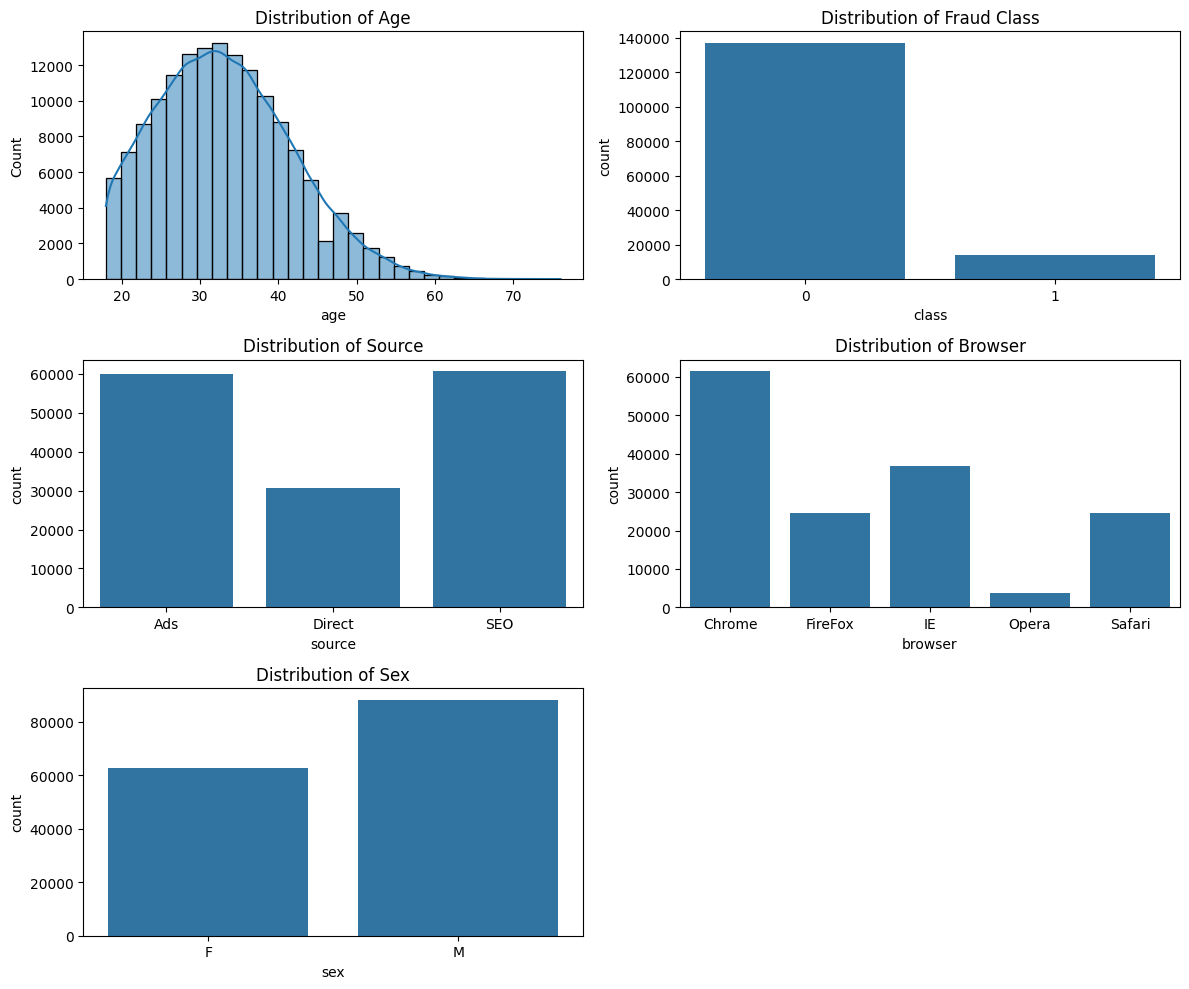

In [18]:
# Univariate analysis for Fraud_Data
# Create a new figure for multiple subplots
plt.figure(figsize=(12, 10))

# First subplot: Distribution of Age
plt.subplot(3, 2, 1)
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Second subplot: Distribution of Fraud Class
plt.subplot(3, 2, 2)
sns.countplot(x='class', data=fraud_data)
plt.title('Distribution of Fraud Class')

# Third subplot: Distribution of Source
plt.subplot(3, 2, 3)
sns.countplot(x='source', data=fraud_data)
plt.title('Distribution of Source')

# Fourth subplot: Distribution of Browser
plt.subplot(3, 2, 4)
sns.countplot(x='browser', data=fraud_data)
plt.title('Distribution of Browser')

# Fifth subplot: Distribution of Sex
plt.subplot(3, 2, 5)
sns.countplot(x='sex', data=fraud_data)
plt.title('Distribution of Sex')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Sixth subplot: Distribution of Purchase Time
plt.figure(figsize=(12, 10))
sns.countplot(x='purchase_time', data=fraud_data)
plt.title('Distribution of purchase_time')

Text(0.5, 1.0, 'Distribution of purchase_time')

In [ ]:
# Sixth subplot: Distribution of Signup Time
plt.figure(figsize=(12, 10))
sns.countplot(x='signup_time', data=fraud_data)
plt.title('Distribution of signup_time')

In [19]:
ip_mapping.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [22]:
ip_mapping['country'].value_counts()

country
United States            46868
Canada                    6989
Russian Federation        6739
Australia                 6316
Germany                   5999
                         ...  
Sao Tome and Principe        1
Tuvalu                       1
Cook Islands                 1
American Samoa               1
Saint Lucia                  1
Name: count, Length: 235, dtype: int64

In [ ]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [25]:
creditcard_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

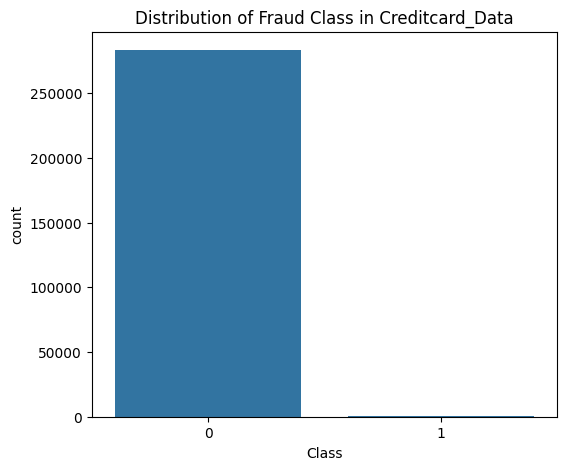

In [30]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=creditcard_data)
plt.title('Distribution of Fraud Class in Creditcard_Data')
plt.show()


**Bivariate analysis**

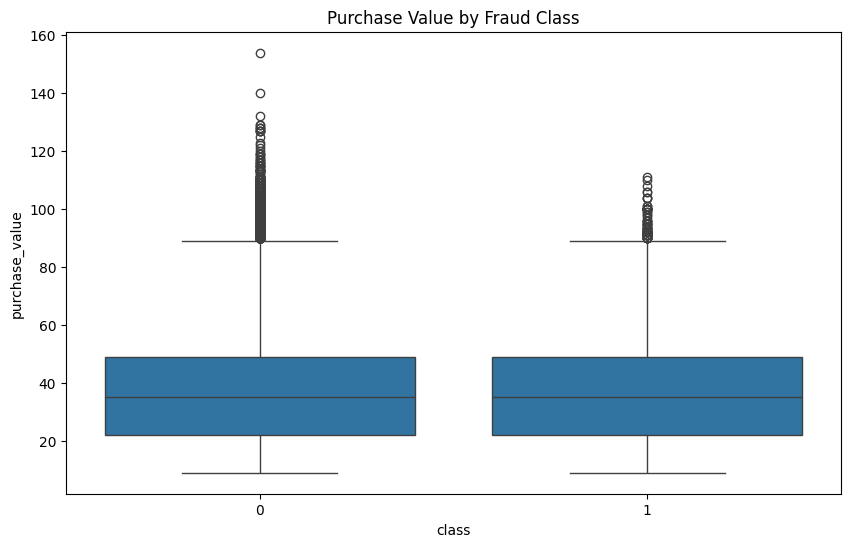

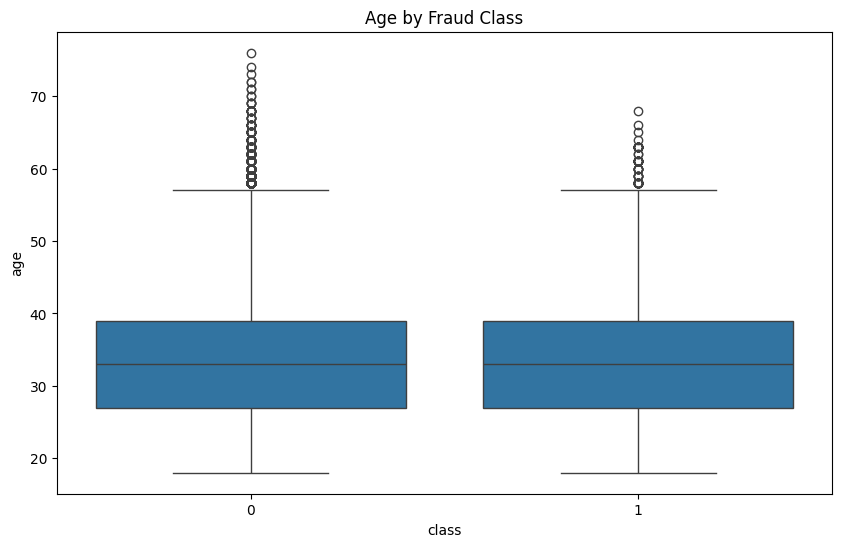

In [31]:
# Relationship between purchase value and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Fraud Class')
plt.show()

# Relationship between user age and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Age by Fraud Class')
plt.show()

In [ ]:


# Boxplot for detecting outliers in purchase_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_data, x='class', y='purchase_value')
plt.title('Purchase Value Outliers by Fraud Class')
plt.show()

# Outlier detection in credit card data (Amount)
plt.figure(figsize=(8, 6))
sns.boxplot(data=creditcard_data, x='Class', y='Amount')
plt.title('Amount Outliers in Credit Card Data')
plt.show()



In [ ]:
# Class distribution in e-commerce data
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

# Class distribution in credit card data
sns.countplot(x='Class', data=creditcard_data)
plt.title('Class Distribution in Credit Card Data')
plt.show()


Bivariate Analysis for Fraud_Data:

Fraud rate by Source:
source
Ads       0.092066
Direct    0.105370
SEO       0.089285
Name: class, dtype: float64

Fraud rate by Browser:
browser
Chrome     0.098792
FireFox    0.095165
IE         0.086775
Opera      0.089227
Safari     0.090201
Name: class, dtype: float64

Fraud rate by Sex:
sex
F    0.091007
M    0.095523
Name: class, dtype: float64


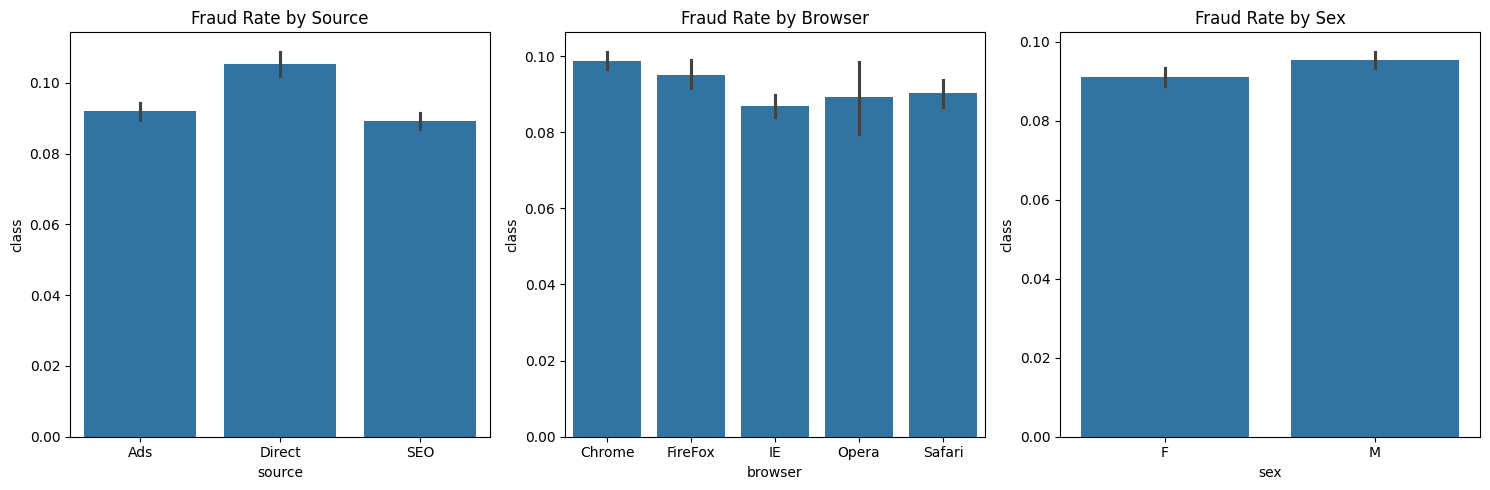

In [32]:
# Bivariate analysis for Fraud_Data
print("\nBivariate Analysis for Fraud_Data:")
print("\nFraud rate by Source:")
print(fraud_data.groupby('source')['class'].mean())
print("\nFraud rate by Browser:")
print(fraud_data.groupby('browser')['class'].mean())
print("\nFraud rate by Sex:")
print(fraud_data.groupby('sex')['class'].mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='source', y='class', data=fraud_data)
plt.title('Fraud Rate by Source')
plt.subplot(1, 3, 2)
sns.barplot(x='browser', y='class', data=fraud_data)
plt.title('Fraud Rate by Browser')
plt.subplot(1, 3, 3)
sns.barplot(x='sex', y='class', data=fraud_data)
plt.title('Fraud Rate by Sex')
plt.tight_layout()
plt.show()

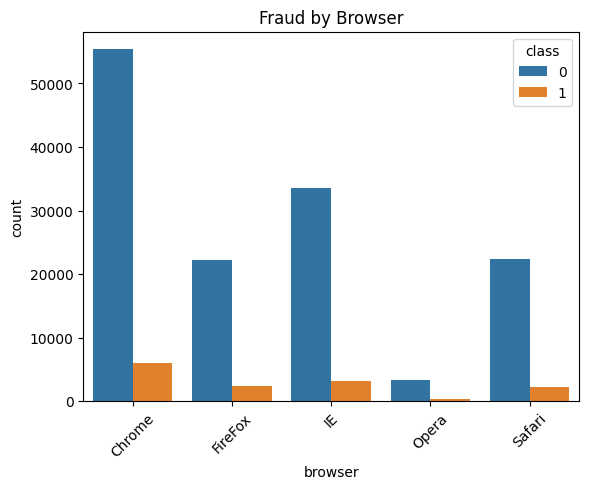

In [50]:
# Browser and fraud analysis
sns.countplot(x='browser', hue='class', data=fraud_data)
plt.title('Fraud by Browser')
plt.xticks(rotation=45)
plt.show()

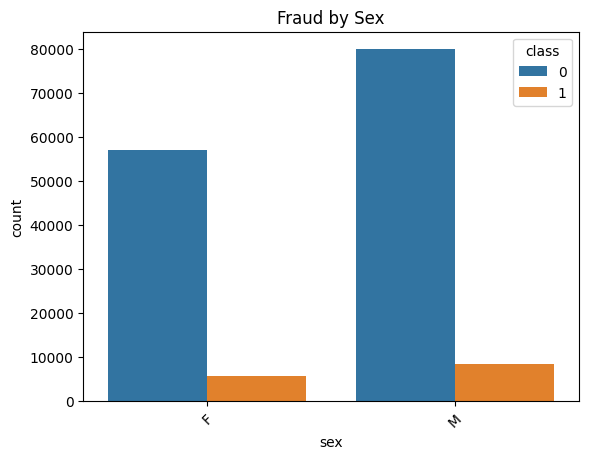

In [51]:
# Sex and fraud analysis
sns.countplot(x='sex', hue='class', data=fraud_data)
plt.title('Fraud by Sex')
plt.xticks(rotation=45)
plt.show()

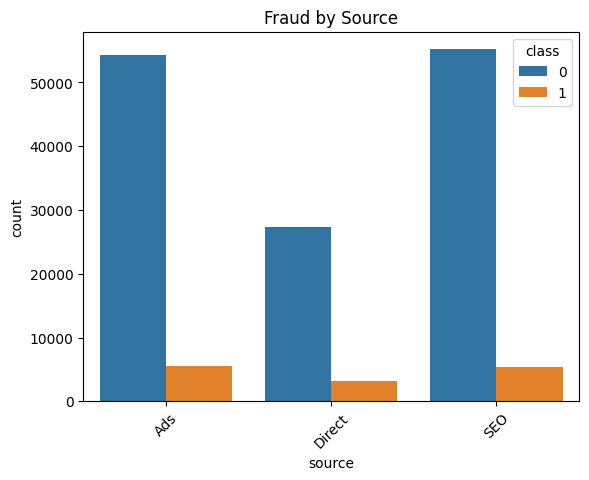

In [52]:
# Source and fraud analysis
sns.countplot(x='source', hue='class', data=fraud_data)
plt.title('Fraud by Source')
plt.xticks(rotation=45)
plt.show()

**Multivariant**

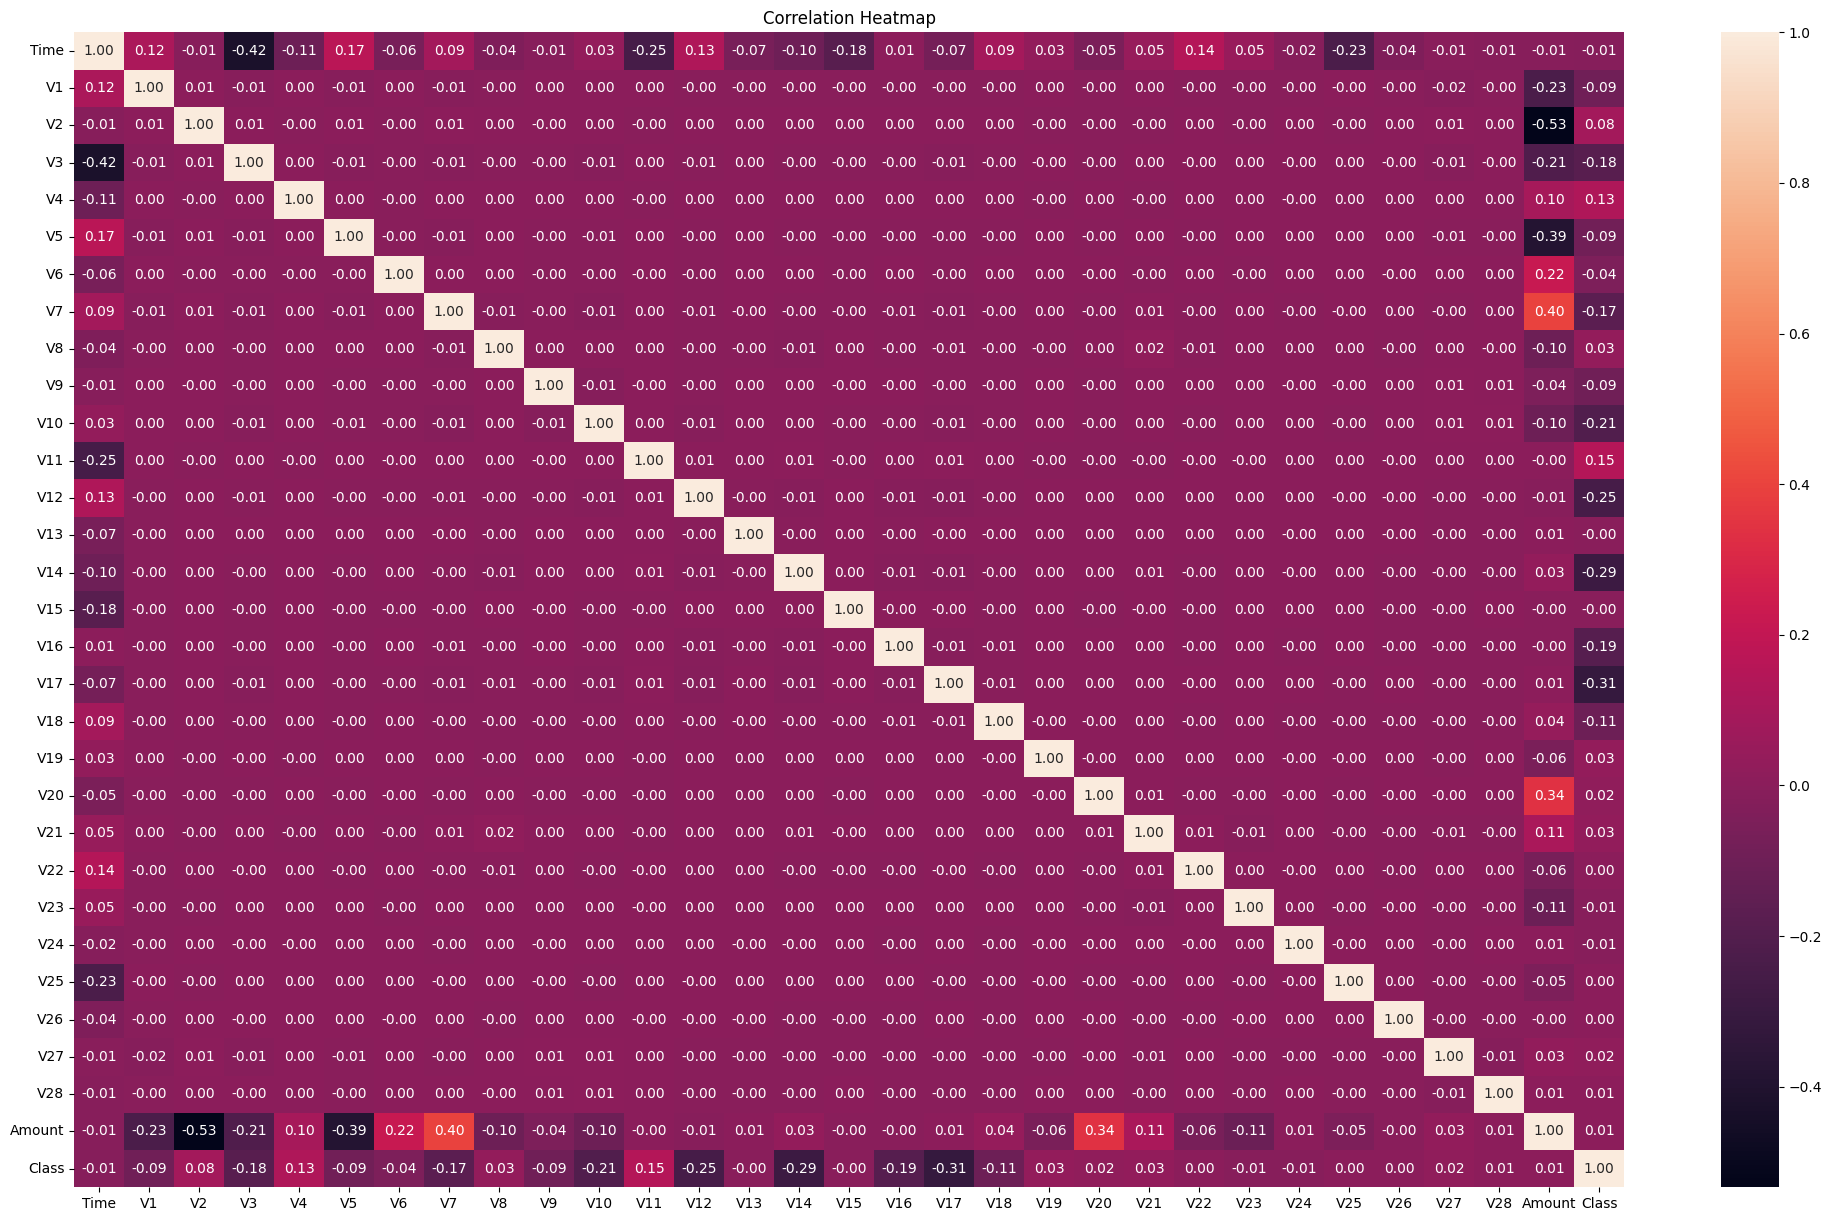

In [62]:
plt.figure(figsize=(25, 15))
sns.heatmap(creditcard_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [74]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
fraud_data['source'] = label_encoder.fit_transform(fraud_data['source'])
fraud_data['browser'] = label_encoder.fit_transform(fraud_data['browser'])
fraud_data['sex'] = label_encoder.fit_transform(fraud_data['sex'])

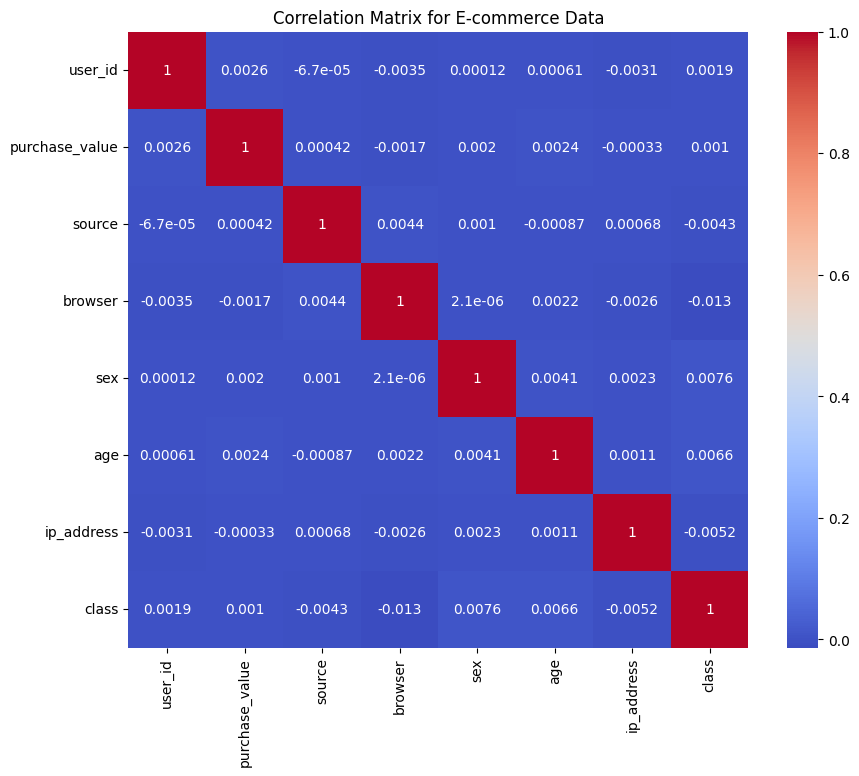

In [45]:
# Correlation matrix for fraud_data
plt.figure(figsize=(10,8))
sns.heatmap(fraud_data.drop(columns=['device_id', 'signup_time', 'purchase_time']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for E-commerce Data')
plt.show()


# Merge Datasets for Geolocation Analysis

**Convert IP addresses to integer format**

In [77]:
def convert_ip_to_int(ip_address):
    try:
        # Ensure IP address is a valid string before conversion
        if isinstance(ip_address, str):
            return int(ip_address.replace('.', ''))
        else:
            return None
    except Exception as e:
        print(f"Error converting IP address {ip_address}: {e}")
        return None


In [78]:
 # Ensure 'ip_address' is treated as a string to handle missing values
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)
# Convert IP addresses to integer format, handling errors
fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [80]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0


In [81]:
# Ensure both 'lower_bound_ip_address' and 'upper_bound_ip_address' in ip_mapping are strings
ip_mapping['lower_bound_ip_address'] = ip_mapping['lower_bound_ip_address'].astype(str)
ip_mapping['upper_bound_ip_address'] = ip_mapping['upper_bound_ip_address'].astype(str)
# Convert the IP addresses in the IP-to-country dataset to integer format
ip_mapping['lower_bound_ip_address'] = ip_mapping['lower_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)
ip_mapping['upper_bound_ip_address'] = ip_mapping['upper_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [82]:
ip_mapping.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,167772160,16777471,Australia
1,167774720,16777727,China
2,167777280,16778239,China
3,167782400,16779263,Australia
4,167792640,16781311,China


**Merge Fraud_Data.csv with IpAddress_to_Country.csv**

In [143]:
df=pd.concat([fraud_data, ip_mapping], axis=1) 
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup_hours,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0,2,5,1251.856111,167772160.0,16777471.0,Australia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0,1,0,4.984444,167774720.0,16777727.0,China
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1,18,3,0.000278,167777280.0,16778239.0,China
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0,13,0,136.690278,167782400.0,16779263.0,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0,18,2,1211.516944,167792640.0,16781311.0,China


In [144]:
# Display the shapes of the datasets
fraud_data.shape, ip_mapping.shape, df.shape

((151112, 14), (138846, 3), (151112, 17))

In [145]:
df.isnull().sum()

user_id                        0
signup_time                    0
purchase_time                  0
purchase_value                 0
device_id                      0
source                         0
browser                        0
sex                            0
age                            0
ip_address                     0
class                          0
hour_of_day                    0
day_of_week                    0
time_since_signup_hours        0
lower_bound_ip_address     12266
upper_bound_ip_address     12266
country                    12266
dtype: int64

In [146]:
df = df.dropna()

In [126]:
# Display the shapes of the datasets
fraud_data.shape, ip_mapping.shape, df.shape

((151112, 14), (138846, 3), (151112, 17))

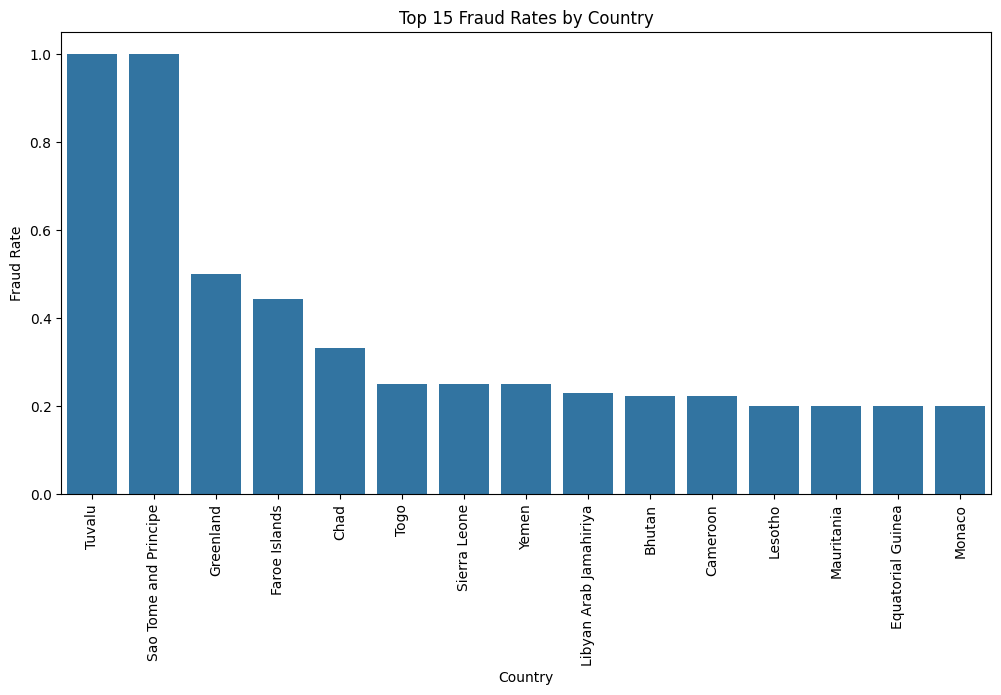

In [91]:
# Group by country and calculate the mean of the 'class' column
country_fraud = df.groupby('country')['class'].mean().reset_index()
# Sort the DataFrame by fraud rate and select the top 15 countries
top_countries = country_fraud.sort_values(by='class', ascending=False).head(15)
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='class', data=top_countries)
plt.title('Top 15 Fraud Rates by Country')
plt.xticks(rotation=90)
plt.ylabel('Fraud Rate')
plt.xlabel('Country')
plt.show()

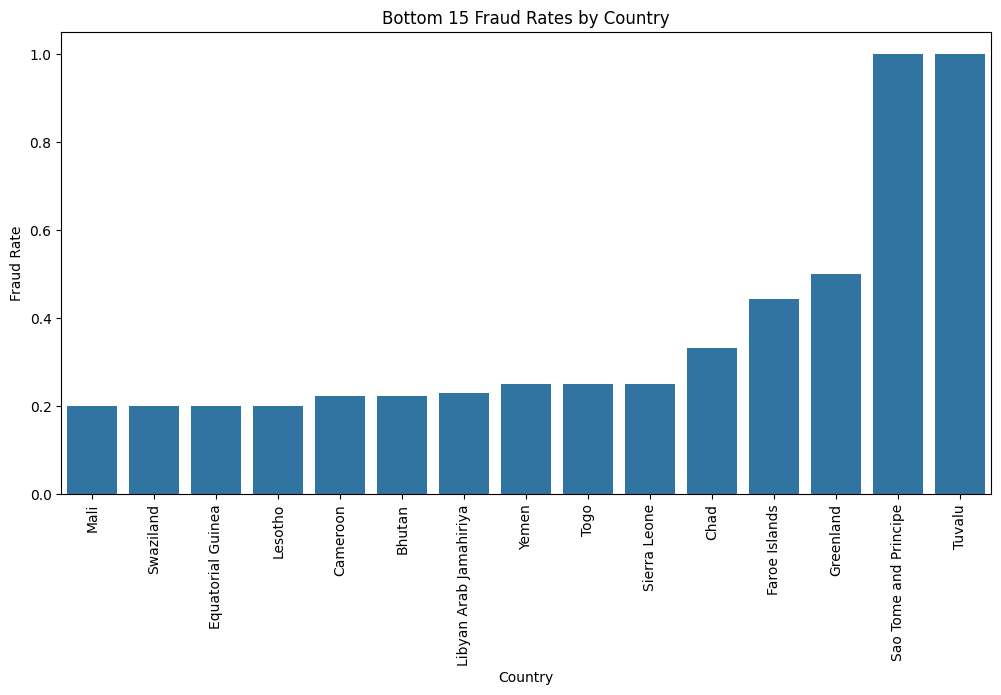

In [92]:
# Group by country and calculate the mean of the 'class' column
country_fraud = df.groupby('country')['class'].mean().reset_index()
# Sort the DataFrame by fraud rate and select the last 15 countries
last_countries = country_fraud.sort_values(by='class').tail(15)
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='class', data=last_countries)
plt.title('Bottom 15 Fraud Rates by Country')
plt.xticks(rotation=90)
plt.ylabel('Fraud Rate')
plt.xlabel('Country')
plt.show()

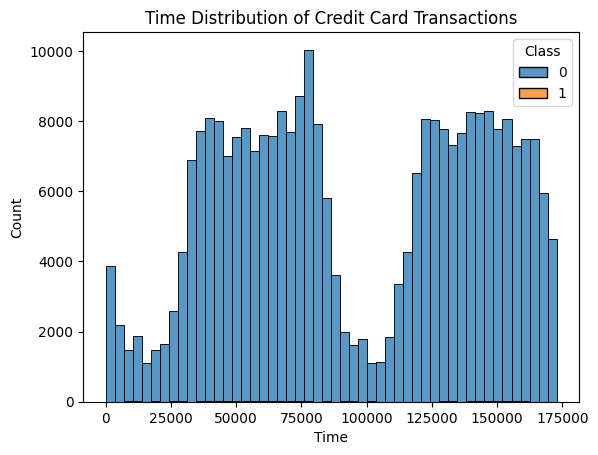

In [93]:
# Time analysis in credit card data
sns.histplot(creditcard_data, x='Time', hue='Class', multiple='stack', bins=50)
plt.title('Time Distribution of Credit Card Transactions')
plt.show()

# Feature Engineering

**Transaction frequency and velocity for Fraud_Data.csv**

In [147]:
# Calculate transaction frequency and velocity
df['transaction_frequency'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()
# Calculate total transactions per user
df['transaction_count'] = df.groupby('user_id')['user_id'].transform('count')

**Time-Based features for Fraud_Data.csv**

        hour_of _day
        
        Day_of_week


In [148]:
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek # Monday=0, Sunday=6

**time_since_signup: Calculate the duration between signup_time and purchase_time.**

In [149]:
df['time_since_signup_hours'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138846 entries, 0 to 138845
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  138846 non-null  int64         
 1   signup_time              138846 non-null  datetime64[ns]
 2   purchase_time            138846 non-null  datetime64[ns]
 3   purchase_value           138846 non-null  int64         
 4   device_id                138846 non-null  category      
 5   source                   138846 non-null  int64         
 6   browser                  138846 non-null  int64         
 7   sex                      138846 non-null  int64         
 8   age                      138846 non-null  int64         
 9   ip_address               138846 non-null  int64         
 10  class                    138846 non-null  int64         
 11  hour_of_day              138846 non-null  int32         
 12  day_of_week          

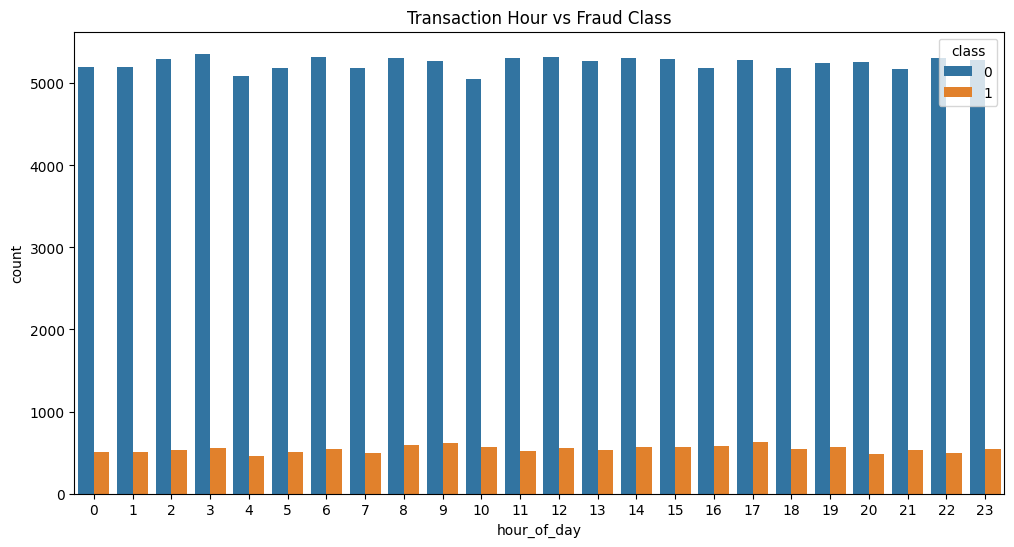

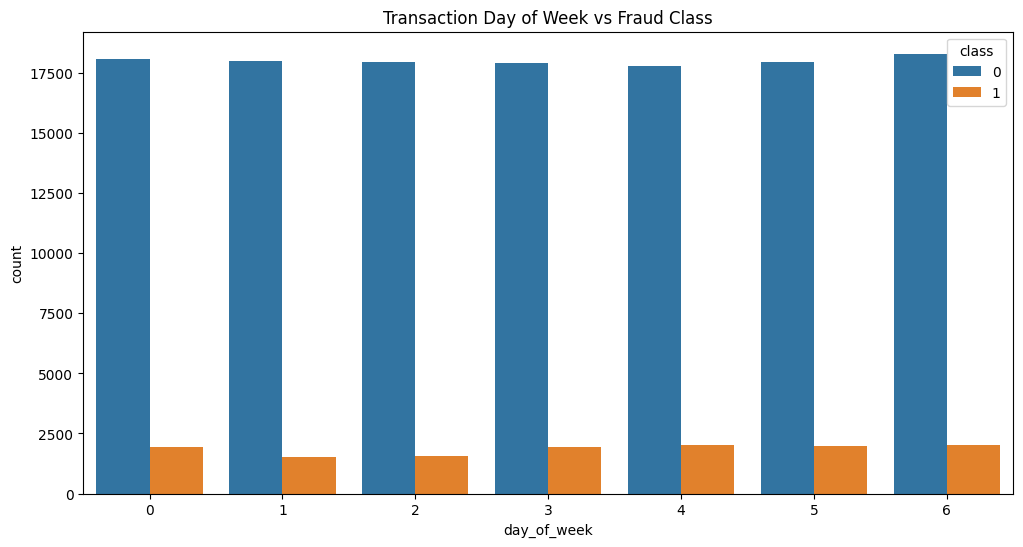

In [104]:
# Visualize time-based features
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', hue='class', data=df)
plt.title('Transaction Hour vs Fraud Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='class', data=df)
plt.title('Transaction Day of Week vs Fraud Class')
plt.show()

# Data Transformation:

**Encode Categorical Features (e.g., One-Hot Encoding).**

In [159]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df['device_id'] = label_encoder.fit_transform(df['device_id'])

**Normalization and Scaling (e.g., StandardScaler, MinMaxScaler).**

In [132]:
df.drop(columns=['signup_time', 'purchase_time'], inplace=True)

**Handle Class Imbalance: Analyze the class distribution. Research and apply appropriate sampling techniques (e.g., SMOTE for oversampling, Random Undersampling) to the**

In [153]:
from sklearn.model_selection import train_test_split
# Split data into features and target
X = df.drop('class', axis=1)  # Features
y = df['class']                # Target
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Prepare data for the model (e-commerce)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


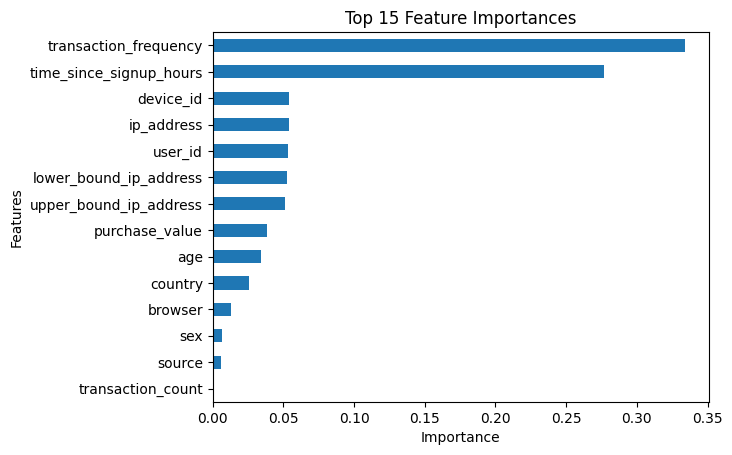

In [172]:
# Ensure that X_train only contains numerical features
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])
# Fit a RandomForest model
model = RandomForestClassifier()
model.fit(X_train_numerical, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train_numerical.columns)
feature_importance.nsmallest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [173]:
#save the processed data
df.to_csv('../data/processed_fraud_data.csv', index=False)  

                    Feature  Importance
0         transaction_count    0.000000
1                    source    0.006140
2                       sex    0.006278
3                   browser    0.012775
4                   country    0.025680
5                       age    0.034208
6            purchase_value    0.038348
7    upper_bound_ip_address    0.051506
8    lower_bound_ip_address    0.052303
9                   user_id    0.053605
10               ip_address    0.053796
11                device_id    0.054243
12  time_since_signup_hours    0.277057


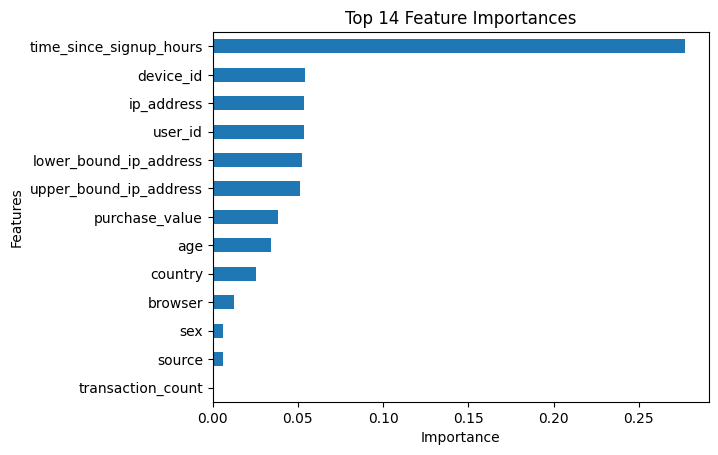

In [179]:
# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train_numerical.columns)
# Get the top 13 features
top_features = feature_importance.nsmallest(13)
# Save to CSV
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Importance']
top_features_df.to_csv('../data/top_13_feature_importance.csv', index=False)
# Optional: Print the top features
print(top_features_df)

# Plot the top 13 feature importances
top_features.plot(kind='barh')
plt.title('Top 14 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()